# Initialize

In [1]:
# Options

## Debugging level
debug_level = 0


In [2]:
# Initialize framework
constants, tools = init_processing(debug_level)
pn.extension()
%matplotlib inline


In [3]:
# Import all preprocessed data
invoice_data_by_customer            = pd.read_pickle(constants.PREPROCESSED_INVOICE_CUSTOMER_FILE_PATH)
invoice_data_by_service_start       = pd.read_pickle(constants.PREPROCESSED_INVOICE_SERVICEDATE_FILE_PATH)
invoice_data_by_invoice_date        = pd.read_pickle(constants.PREPROCESSED_INVOICE_INVOICEDATE_FILE_PATH)
forecast                            = pd.read_pickle(constants.PREPROCESSED_FORECAST_CLEANED_FILE_PATH)
revenue2020A                        = pd.read_pickle(constants.PREPROCESSED_REVENUE2020A_CLEANED_FILE_PATH)


In [4]:
invoice_data_by_customer.dtypes

NumberOfUsers                                      float64
InvoiceDate               datetime64[ns, America/New_York]
InvoiceNumber                                       object
InvoiceAmount                                      float64
Subscription                                        object
AccountCode                                         object
Address                                             object
Lat                                                float64
Long                                               float64
ServiceStart              datetime64[ns, America/New_York]
ServiceEnd                datetime64[ns, America/New_York]
SubscriptionDuration                       timedelta64[ns]
ServiceDelay                                       float64
InvoiceDate_Year                                     int64
InvoiceDate_Month                                    int64
InvoiceDate_MonthName                               object
InvoiceDate_Quarter                                  int

In [5]:
invoice_data_by_customer[invoice_data_by_customer["ServiceStart_Year"] == 2015]


,NumberOfUsers,InvoiceDate,InvoiceNumber,InvoiceAmount,Subscription,AccountCode,Address,Lat,Long,ServiceStart,...,InvoiceDate_MonthName,InvoiceDate_Quarter,ServiceStart_Year,ServiceStart_Month,ServiceStart_MonthName,ServiceStart_Quarter,ServiceEnd_Year,ServiceEnd_Month,ServiceEnd_MonthName,ServiceEnd_Quarter
Customers,,,,,,,,,,,,,,,,,,,,,
Louisiana Board Of Regents,NaN,2015-03-20 00:00:00-04:00,ATLAS 315,72000.0,1 Year,4700-0-00-00000-18-0000,"1201 N 3rd St #6, Baton Rouge, LA 70802",30.460190,-91.188530,2015-03-18 00:00:00-04:00,...,March,1,2015.0,3.0,March,1.0,2016.0,6.0,June,2.0
Emporia State University,250.0,2015-05-28 00:00:00-04:00,AJ501,3500.0,1 Year,4700-0-00-00000-16-0000,"1 Kellogg Cir, Emporia, KS 66801",38.392609,-96.181396,2015-06-01 00:00:00-04:00,...,May,2,2015.0,6.0,June,2.0,2016.0,6.0,June,2.0
Morehead State University,100.0,2015-06-23 00:00:00-04:00,AJ502,3500.0,1 Year,4700-0-00-00000-17-0000,"150 University Blvd, Morehead, KY 40351",38.184921,-83.434441,2015-06-10 00:00:00-04:00,...,June,2,2015.0,6.0,June,2.0,2016.0,6.0,June,2.0
State University Of Ny Potsdam,NaN,2015-06-26 00:00:00-04:00,AJ503,6500.0,1 Year,4700-0-00-00000-32-0000,"44 Pierrepont Ave, Potsdam, NY 13676",44.663780,-74.978409,2015-06-01 00:00:00-04:00,...,June,2,2015.0,6.0,June,2.0,2016.0,6.0,June,2.0
St. Mary'S College Of Maryland,NaN,2015-10-07 00:00:00-04:00,AJ504,750.0,1 Year,4700-0-00-00000-20-0000,"47645 College Dr, St Marys City, MD 20686",38.190601,-76.426300,2015-10-05 00:00:00-04:00,...,October,4,2015.0,10.0,October,4.0,2016.0,9.0,September,3.0
Clark County Education Association,NaN,2015-10-19 00:00:00-04:00,AJ505,3400.0,1 Year,4700-0-00-00000-28-0000,"4230 McLeod Dr, Las Vegas, NV 89121",36.112561,-115.109222,2015-10-01 00:00:00-04:00,...,October,4,2015.0,10.0,October,4.0,2016.0,10.0,October,4.0
Bureau Of Indian Affairs,NaN,2015-10-27 00:00:00-04:00,AJ506,28000.0,1 Year,4700-4-11-00100-00-1502,"1849 C Street, N.W Washington, D.C. 20240",38.894453,-77.042603,2015-09-18 00:00:00-04:00,...,October,4,2015.0,9.0,September,3.0,2016.0,12.0,December,4.0
Bureau Of Indian Affairs,NaN,2015-12-10 00:00:00-05:00,AJ507,16200.0,1 Year,4700-4-11-00100-00-1502,"1849 C Street, N.W Washington, D.C. 20240",38.894453,-77.042603,2015-09-18 00:00:00-04:00,...,December,4,2015.0,9.0,September,3.0,2016.0,12.0,December,4.0
College Of William And Mary,250.0,2015-12-17 00:00:00-05:00,AJ508,3500.0,1 Year,4700-0-00-00000-00-0000,"200 Stadium Dr, Williamsburg, VA 23185",37.271740,-76.714260,2015-10-22 00:00:00-04:00,...,December,4,2015.0,10.0,October,4.0,2016.0,10.0,October,4.0


<AxesSubplot:title={'center':'Cumulative Invoices over Time'}, xlabel='InvoiceDate'>

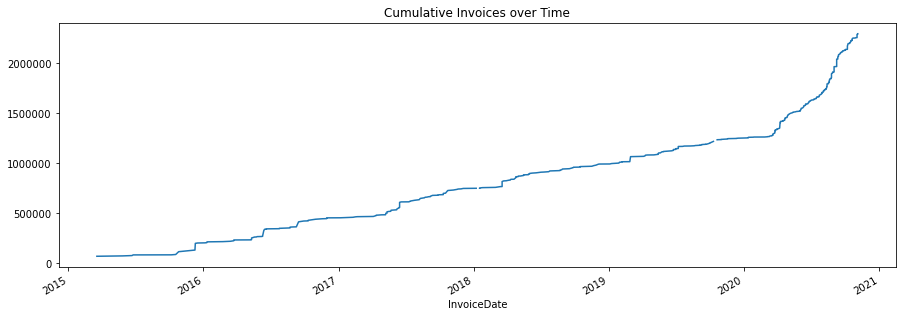

In [6]:
ax = invoice_data_by_invoice_date["InvoiceAmount"].cumsum().plot.line(y="InvoiceAmount", figsize=(15, 5), title="Cumulative Invoices over Time")
ax.yaxis.set_major_formatter(FormatStrFormatter("%d"))
ax

Column
    [0] Str(None)
    [1] Str(None)
    [2] Str(None)
    [3] Str(None)
    [4] Str(None)
    [5] Str(None)
    [6] Str(None)
    [7] Str(None)

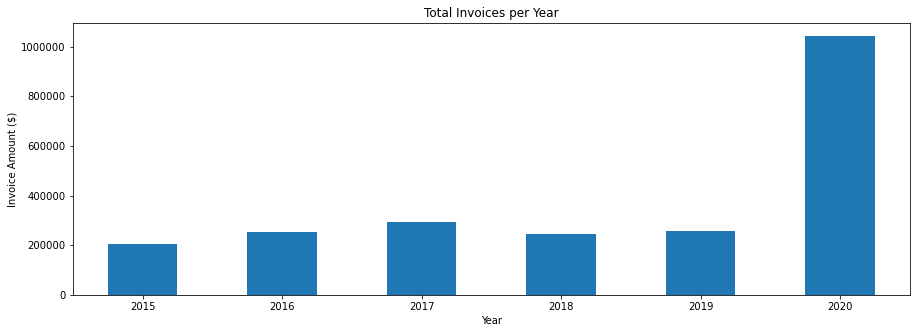

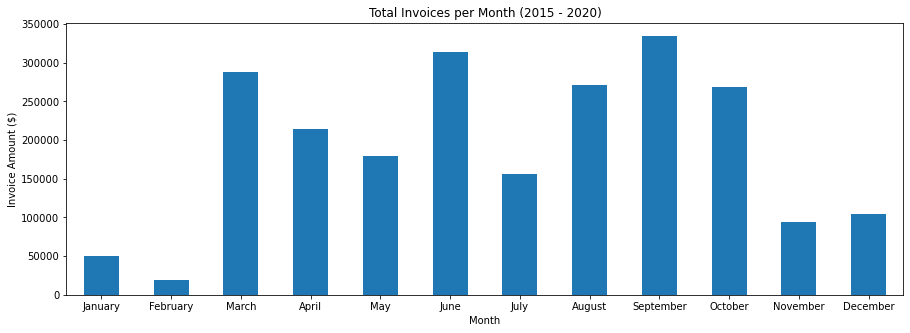

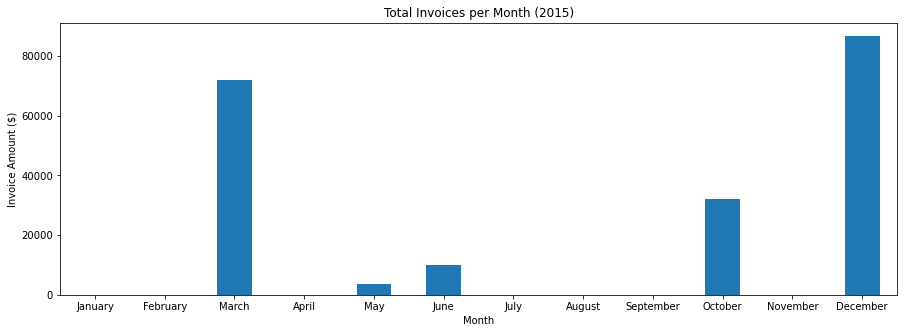

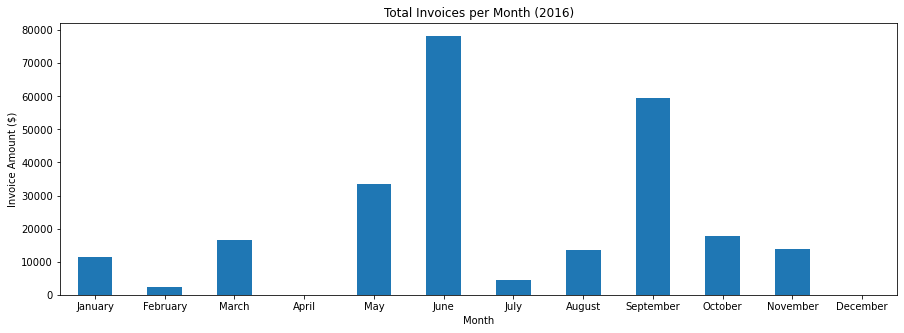

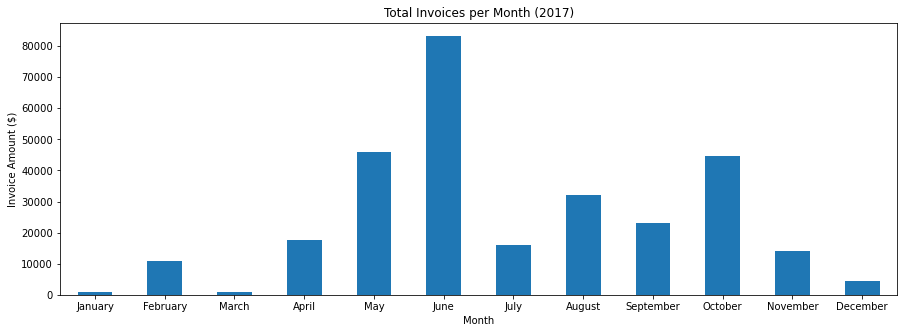

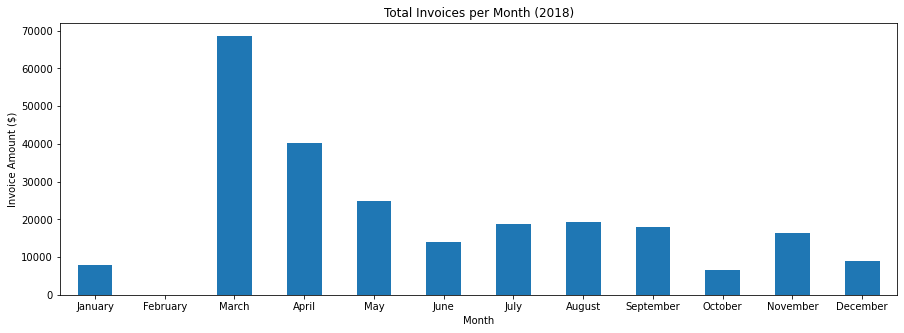

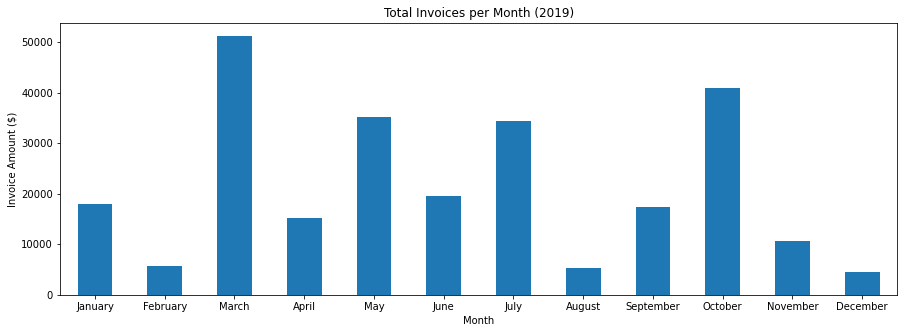

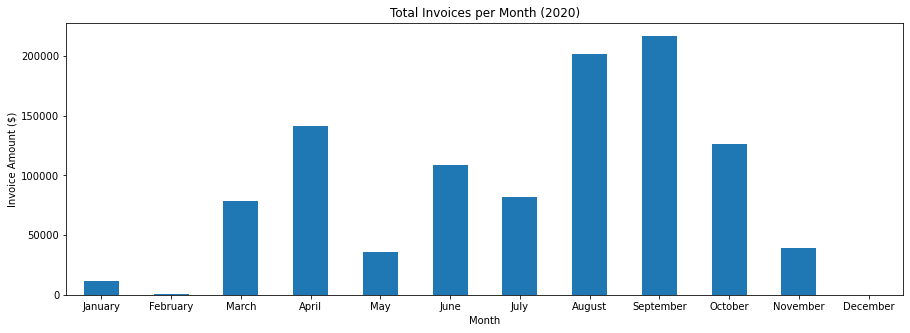

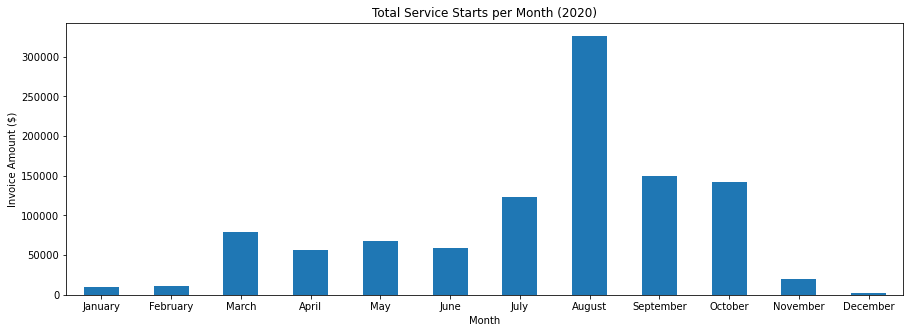

In [19]:
# Invoice amounts per year
invoices_per_year = invoice_data_by_customer.groupby("InvoiceDate_Year").sum().reset_index().plot.bar(
    x="InvoiceDate_Year", y="InvoiceAmount",
    title="Total Invoices per Year", xlabel="Year", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))

# Invoice amounts per month
invoices_per_month = invoice_data_by_customer.groupby("InvoiceDate_MonthName").sum().reindex(constants.month_names).plot.bar(
    y="InvoiceAmount",
    title="Total Invoices per Month (2015 - 2020)", xlabel="Month", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))

invoices_per_month_2015 = invoice_data_by_customer[invoice_data_by_customer["InvoiceDate_Year"] == 2015].groupby("InvoiceDate_MonthName").sum().reindex(constants.month_names).plot.bar(
    y="InvoiceAmount",
    title="Total Invoices per Month (2015)", xlabel="Month", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))
invoices_per_month_2016 = invoice_data_by_customer[invoice_data_by_customer["InvoiceDate_Year"] == 2016].groupby("InvoiceDate_MonthName").sum().reindex(constants.month_names).plot.bar(
    y="InvoiceAmount",
    title="Total Invoices per Month (2016)", xlabel="Month", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))
invoices_per_month_2017 = invoice_data_by_customer[invoice_data_by_customer["InvoiceDate_Year"] == 2017].groupby("InvoiceDate_MonthName").sum().reindex(constants.month_names).plot.bar(
    y="InvoiceAmount",
    title="Total Invoices per Month (2017)", xlabel="Month", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))
invoices_per_month_2018 = invoice_data_by_customer[invoice_data_by_customer["InvoiceDate_Year"] == 2018].groupby("InvoiceDate_MonthName").sum().reindex(constants.month_names).plot.bar(
    y="InvoiceAmount",
    title="Total Invoices per Month (2018)", xlabel="Month", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))
invoices_per_month_2019 = invoice_data_by_customer[invoice_data_by_customer["InvoiceDate_Year"] == 2019].groupby("InvoiceDate_MonthName").sum().reindex(constants.month_names).plot.bar(
    y="InvoiceAmount",
    title="Total Invoices per Month (2019)", xlabel="Month", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))
invoices_per_month_2020 = invoice_data_by_customer[invoice_data_by_customer["InvoiceDate_Year"] == 2020].groupby("InvoiceDate_MonthName").sum().reindex(constants.month_names).plot.bar(
    y="InvoiceAmount",
    title="Total Invoices per Month (2020)", xlabel="Month", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))

service_starts_per_month_2020 = invoice_data_by_customer[invoice_data_by_customer["ServiceStart_Year"] == 2020].groupby("ServiceStart_MonthName").sum().reindex(constants.month_names).plot.bar(
    y="InvoiceAmount",
    title="Total Service Starts per Month (2020)", xlabel="Month", ylabel="Invoice Amount ($)",
    figsize=(15, 5), rot=0, legend=None
    ).yaxis.set_major_formatter(FormatStrFormatter("%d"))


# # Invoice amounts per month
# number_of_invoices_per_month = atlas_ymq.groupby("Monthly").sum().reset_index().hvplot.bar(
#     x="Monthly", y="Invoice Amount",
#     title="Total Invoices per Month", xlabel="Month", ylabel="Invoice Amount ($)",
#     figsize=(15, 5), rot=0)

# Show plots
pn.Column(
    invoices_per_year,
    invoices_per_month,
    invoices_per_month_2015,
    invoices_per_month_2016,
    invoices_per_month_2017,
    invoices_per_month_2018,
    invoices_per_month_2019,
    invoices_per_month_2020,
    # number_of_invoices_per_month
    )

# TODO Make drop-down to filter by year in the monthly plot.


<AxesSubplot:ylabel='InvoiceAmount'>

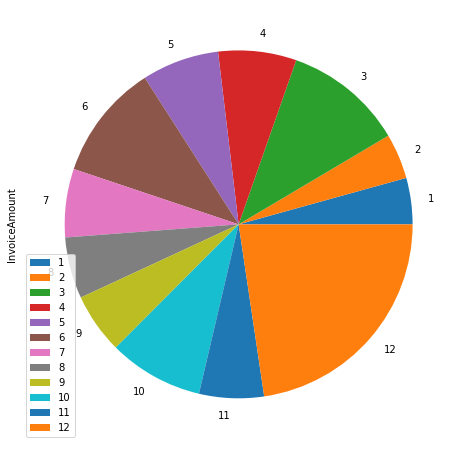

In [20]:
# Display average customer amount invoiced per year, month, or day
invoice_data_by_customer.groupby(["InvoiceDate_Month"]).mean().plot.pie(x="Customers", y="InvoiceAmount", figsize=(8, 8))

# TODO change to invoice counts per month:  atlas.groupby("Subscription").count()


In [ ]:
forecast.head()

In [ ]:
forecast.groupby(["Mailing State/Province"]).mean().plot.pie(x="Mailing State/Province", y="Subscription Fee", figsize=(8, 8))

In [ ]:
forecast.plot.line(x="Contract Start Date", y="Subscription Fee", figsize=(15, 5), title="Subscription Fee over Time")

In [ ]:
# Display average customer amount invoiced per year, month, or day
forecast_ymq.groupby(["Quarterly"]).mean().plot.pie(x="Quarterly", y="Subscription Fee", figsize=(8, 8))

In [ ]:
forecast_ymq.groupby(["Monthly"]).mean().plot.pie(x="Monthly", y="Subscription Fee", figsize=(8, 8))

In [ ]:
forecast_ymq.groupby(["Monthly"]).mean().reset_index().plot.bar(x="Monthly", y="Subscription Fee", figsize=(8, 8))

In [ ]:
revenue2020.head()

In [ ]:
revenue2020.groupby(["Month"]).mean().reset_index().plot.bar(x="Month", y="Total", figsize=(8, 8))

In [ ]:
revenue2020A.head()

In [ ]:
# Display average customer amount invoiced per year, month, or day
revenue2020A_ymq.groupby(["Monthly"]).mean().plot.pie(x="Monthly", y="Invoice Amount", figsize=(10, 10))